<a href="https://colab.research.google.com/github/joannawqy/ECON323/blob/main/FinalProject_visual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [34]:
df = pd.read_csv("merged_data.csv")

In [35]:
df.head()

,country,Code,ContinentCode,year,GDP per capita constant 2010 dollars,Capital investment as percent of GDP,Capital investment billion USD,Household consumption as percent of GDP,Household consumption billion USD,Labor force million people,...,Government spending billion USD,Population growth percent,Happiness Index 0 (unhappy) - 10 (happy),Economic growth: the rate of change of real GDP,Gross Domestic Product billions of 2010 U.S. dollars,Unemployment rate,Exports of goods and services billion USD,Exports of goods and services annual growth,Current account balance billion USD,ranking index
0,Argentina,ARG,SA,2017,13595.04,18.21,117.22,66.74,429.55,19.58,...,113.90,1.04,6.60,2.82,598.8,8.35,72.86,2.62,-31.15,116
1,Argentina,ARG,SA,2018,13105.40,16.61,87.19,69.47,364.59,20.10,...,82.95,1.02,6.39,-2.62,583.1,9.22,75.77,0.65,-27.08,126
2,Argentina,ARG,SA,2019,12716.22,14.21,63.63,66.13,296.09,20.61,...,73.63,0.99,6.09,-2.00,571.5,9.84,80.26,9.75,-3.49,128
3,Argentina,ARG,SA,2020,11341.27,14.13,54.48,63.79,245.94,19.41,...,65.12,0.97,5.93,-9.94,514.6,11.46,64.04,-17.71,3.12,128
4,Argentina,ARG,SA,2021,12402.49,17.47,85.14,60.89,296.69,21.19,...,77.19,0.95,5.97,10.40,568.1,8.74,87.87,9.22,6.71,133


In [36]:
nans = df.isna().sum()
nan_columns = nans[nans > 0]
nan_columns

ContinentCode    18
dtype: int64

## Correlation Heatmap

<ipython-input-37-a340f3ec8605>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



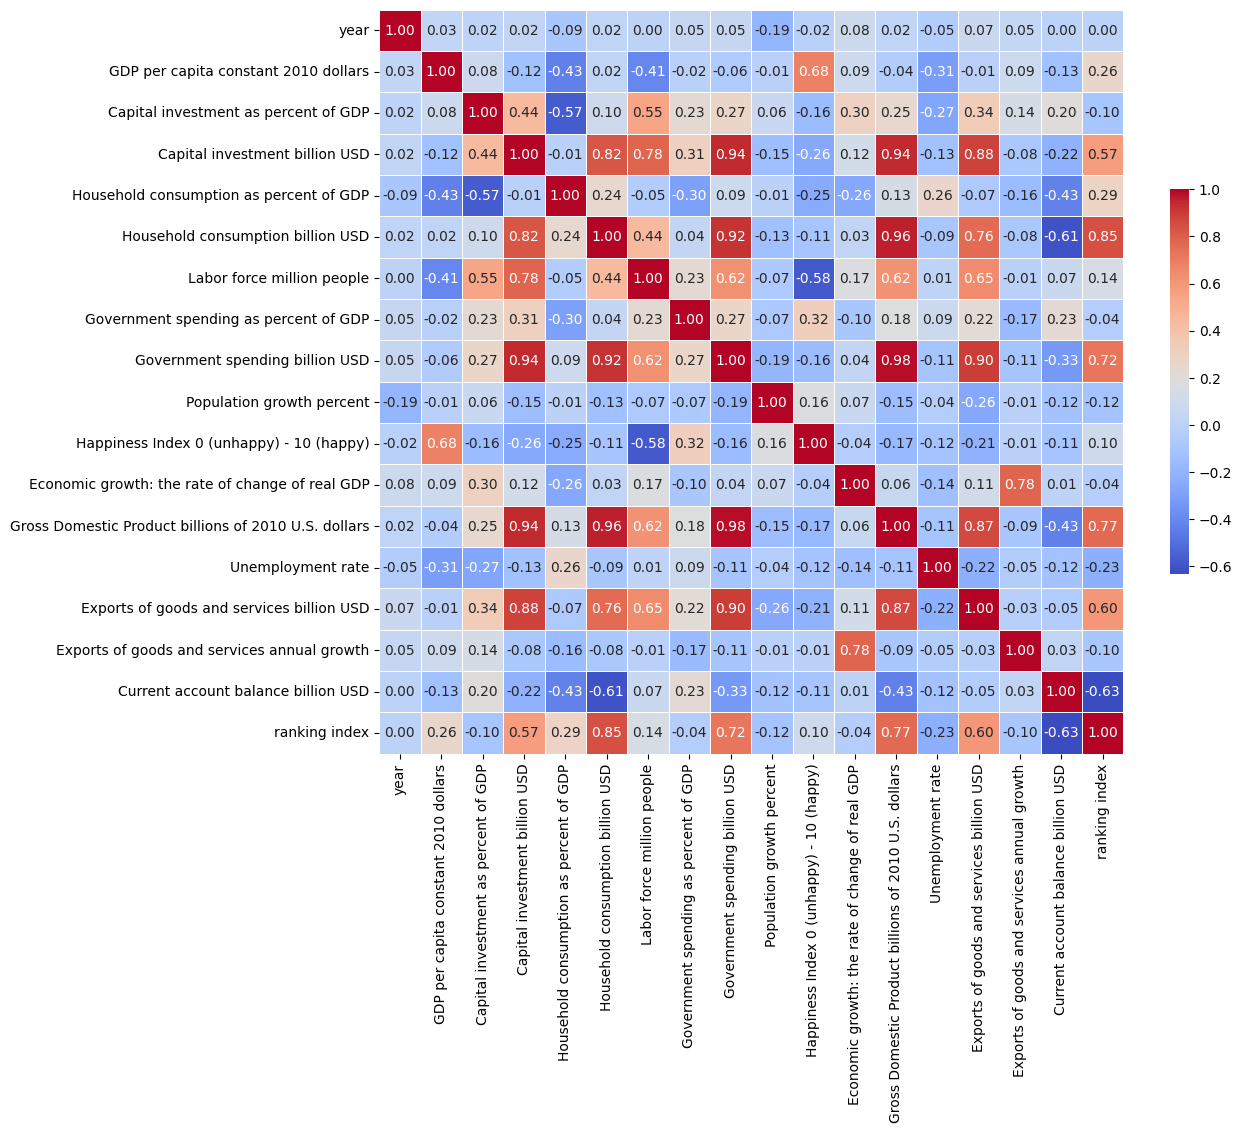

In [37]:
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [38]:
high_corr_pairs = corr_matrix.abs().unstack().sort_values(kind="quicksort", ascending=False)

# Filter out pairs of the same variable (correlation of 1) and lower correlations
high_corr_pairs = high_corr_pairs[high_corr_pairs < 1]
high_corr_pairs = high_corr_pairs[high_corr_pairs >= 0.5]

# Output the pairs with high correlation
high_corr_pairs

Gross Domestic Product billions of 2010 U.S. dollars  Government spending billion USD                         0.982074
Government spending billion USD                       Gross Domestic Product billions of 2010 U.S. dollars    0.982074
Gross Domestic Product billions of 2010 U.S. dollars  Household consumption billion USD                       0.961335
Household consumption billion USD                     Gross Domestic Product billions of 2010 U.S. dollars    0.961335
Capital investment billion USD                        Gross Domestic Product billions of 2010 U.S. dollars    0.940435
Gross Domestic Product billions of 2010 U.S. dollars  Capital investment billion USD                          0.940435
Capital investment billion USD                        Government spending billion USD                         0.936655
Government spending billion USD                       Capital investment billion USD                          0.936655
                                                

## Predictors Time Series

In [49]:
import plotly.graph_objs as go

variables = [
    "Capital investment billion USD",
    "Household consumption billion USD",
    "Government spending billion USD",
    "Gross Domestic Product billions of 2010 U.S. dollars",
    "Exports of goods and services billion USD",
    "Current account balance billion USD"
]

for variable in variables:

  fig = go.Figure()

  for country in df['country'].unique():
      df_country = df[df['country'] == country]
      fig.add_trace(go.Scatter(
          x=df_country['year'],
          y=df_country[variable],
          name=country,
          visible=True
      ))

  buttons = [
      dict(label='All Countries',
          method='update',
          args=[{'visible': [True] * len(df['country'].unique())},  # Set all traces to visible
                {'title': f'{variable} Over Years by Country'}])
  ]

  for country in df['country'].unique():
      visible_list = [country == c for c in df['country'].unique()]
      buttons.append(
          dict(label=country,
              method='update',
              args=[{'visible': visible_list},
                    {'title': f'{variable} Over Years: {country}'}])
      )

  fig.update_layout(
      updatemenus=[
          go.layout.Updatemenu(
              buttons=buttons,
              direction='down',
              pad={'r': 10, 't': 10},
              showactive=True,
              x=0,
              xanchor='left',
              y=1.1,
              yanchor='top',
              bgcolor='#AAAAAA',
              bordercolor='#FFFFFF',
              font=dict(size=11, color='#000000')
          )
      ],
      title=f'{variable} Over Years by Country'
  )

  fig.update_xaxes(title_text='Year')
  fig.update_yaxes(title_text=f'{variable}')

  fig.show()

## Map of Rank Index

In [54]:
import plotly.express as px

# Determine the fixed range for the color scale
# This could be based on the min and max of the "ranking index" or a range you decide
color_scale_min = df['ranking index'].min()
color_scale_max = df['ranking index'].max()

# Create the map with a fixed color scale
fig = px.choropleth(
    df,
    locations="Code",
    color="ranking index",
    hover_name="country",
    animation_frame="year",
    color_continuous_scale=px.colors.sequential.Plasma,  # Using blue color scale
    range_color=[color_scale_min, color_scale_max],  # Set the fixed range for the color scale
    projection="natural earth",
    title="Country Ranking Index Over Years"
)

# Set the layout for the slider
fig.layout.sliders[0].pad.t = 10

# Show the figure
fig.show()

## Regression

### Seperate

In [ ]:
import statsmodels.api as sm
# Prepare the data
X = df.drop(['country', 'Code','ContinentCode','year'], axis=1)  # Drop the target variable
y_log = np.log(df['ranking index'])  # If y contains zero, use np.log(y + 1) to avoid -inf

# Create subplots
fig, axes = plt.subplots(nrows=len(X.columns), ncols=1, figsize=(8, 4 * len(X.columns)))

# Plot individual regressions with the log-transformed y
for i, column in enumerate(X.columns):
    # Add a constant term to the predictor
    X_col = sm.add_constant(df[column])

    # Fit the model using the log-transformed y
    model = sm.OLS(y_log, X_col).fit()

    # Scatter plot
    axes[i].scatter(df[column], y_log, alpha=0.5, label='Data points')  # Use y_log here

    # Regression line
    axes[i].plot(df[column], model.predict(X_col), color='red', label='Regression line')

    # Labels and title
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Log of Ranking Index')  # Update the ylabel to reflect the log transformation
    axes[i].set_title(f'Linear Regression of Log of Ranking Index on {column}')
    axes[i].legend()

plt.tight_layout()
plt.show()


### Matrix

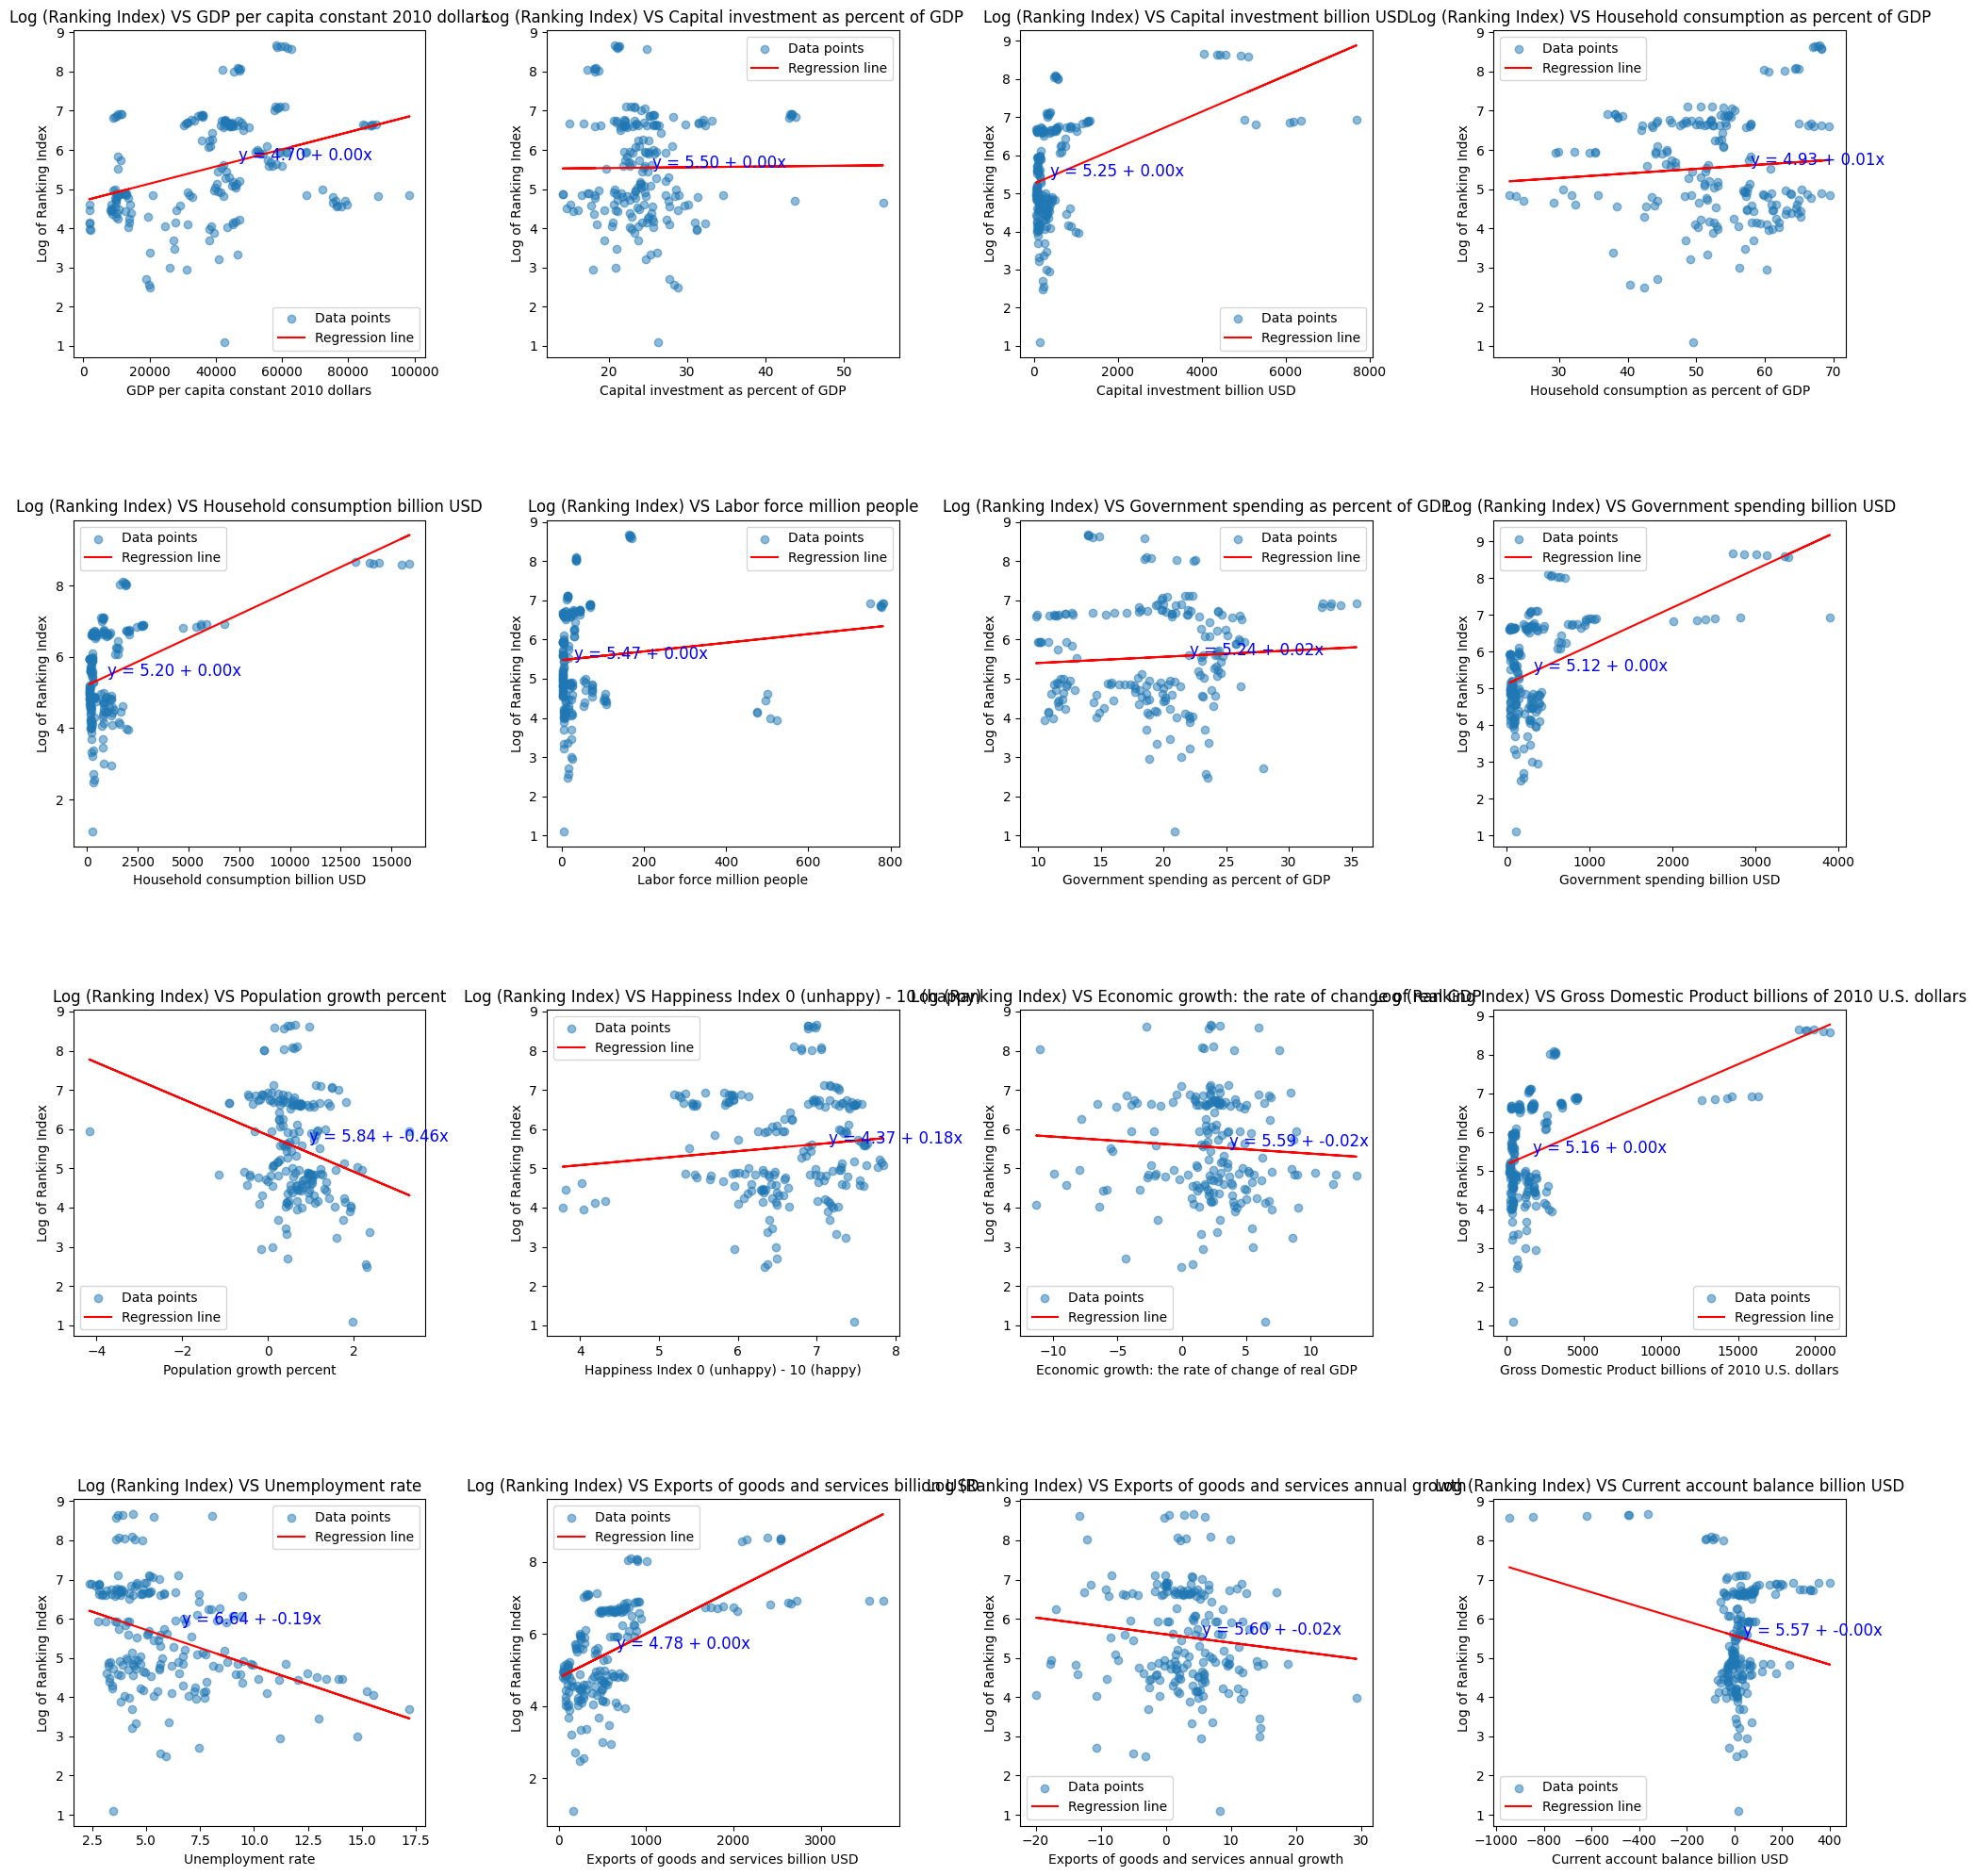

In [ ]:
import statsmodels.api as sm

# Assuming df is your DataFrame and 'ranking index' is your response variable

# Drop the non-predictor columns as well as the target variable 'ranking index'
columns_to_drop = ['country', 'Code', 'ContinentCode', 'year', 'ranking index']
X = df.drop(columns_to_drop, axis=1)

# Apply log transformation to y, ensure no zero or negative values in 'ranking index'
y = df['ranking index']
y_log = np.log(y + 1)  # Adding 1 to avoid taking log of zero

# Create a 4x4 matrix of subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))  # Adjust the size as needed
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Plot individual regressions with the log-transformed y
for i, column in enumerate(X.columns):
    # Add a constant term to the predictor
    X_col = sm.add_constant(df[column])

    # Fit the model using the log-transformed y
    model = sm.OLS(y_log, X_col, missing='drop').fit()  # 'missing=drop' to handle NaNs

    # Scatter plot
    axes[i].scatter(df[column], y_log, alpha=0.5, label='Data points')

    # Regression line
    predicted_values = model.predict(X_col)
    axes[i].plot(df[column], predicted_values, color='red', label='Regression line')

    # Get the equation of the line
    intercept, slope = model.params
    line_eq = f"y = {intercept:.2f} + {slope:.2f}x"

    # Plot the equation somewhere on the plot
    x_val = np.percentile(df[column].dropna(), 70)  # A value from the 70th percentile, dropping NaNs
    y_val = np.percentile(predicted_values, 70)  # Corresponding y value
    axes[i].text(x_val, y_val, line_eq, fontsize=12, color='blue')

    # Labels and title
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Log of Ranking Index')
    axes[i].set_title(f'Log (Ranking Index) VS {column}')
    axes[i].legend()

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()

for j in range(i+1, 16):
    fig.delaxes(axes[j])
